# TP: Pandas Cleaning

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv("data/source.csv")
df.columns = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [66]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [67]:
df.drop('Id', axis=1, inplace=True)

In [68]:
df.describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump_thickness,698.0,4.416905,2.817673,1.0,2.0,4.0,6.0,10.0
Uniformity_Cell_Size,698.0,3.137536,3.052575,1.0,1.0,1.0,5.0,10.0
Uniformity_Cell_Shape,698.0,3.210602,2.972867,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,698.0,2.809456,2.856606,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,698.0,3.217765,2.215408,1.0,2.0,2.0,4.0,10.0
Bland_Chromatin,698.0,3.438395,2.440056,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,698.0,2.869628,3.055004,1.0,1.0,1.0,4.0,10.0
Mitoses,698.0,1.590258,1.716162,1.0,1.0,1.0,1.0,10.0
Class,698.0,2.690544,0.951596,2.0,2.0,2.0,4.0,4.0


In [69]:
for i in df.columns:
    print(df[i].value_counts())

Clump_thickness
1     145
5     129
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
Uniformity_Cell_Size
1     383
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity_Cell_Shape
1     352
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: count, dtype: int64
Marginal_Adhesion
1     406
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
Single_Epithelial_Cell_Size
2     385
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
Bare_Nuclei
1     401
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64
Bland_Chromatin
2     166
3     164
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
N

In [70]:
for i in df.columns:
    print(df[i].isnull().sum())
    df[i] = pd.to_numeric(df[i], errors="coerce") 

0
0
0
0
0
0
0
0
0
0


In [71]:
df.to_csv("data/out.csv")

In [72]:
for col in df:
    col_mediane = df[col].median()
    df[col].fillna(col_mediane,inplace=True)

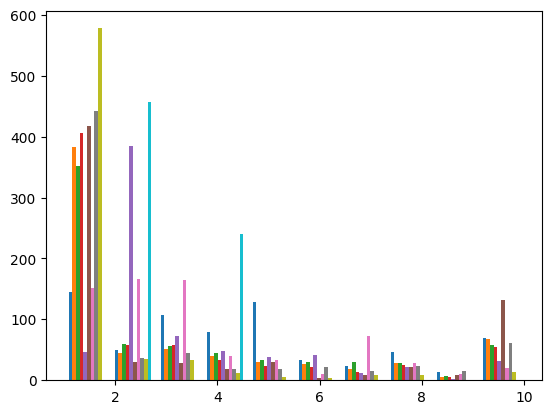

In [73]:
fig = plt.Figure(figsize=(10,6))
plt.hist(df)
plt.show()

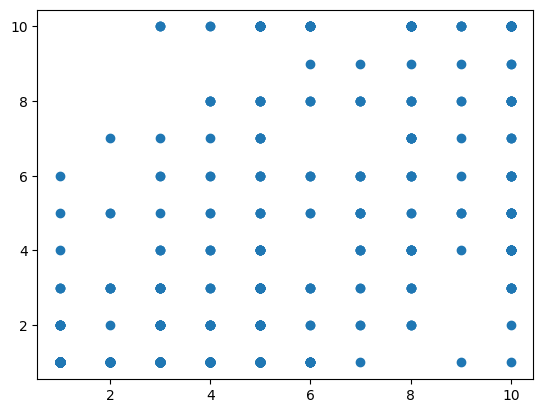

In [74]:
fig = plt.Figure(figsize=(10,6))
plt.scatter(df['Clump_thickness'], df['Uniformity_Cell_Size'])
plt.show()

NameError: name 'columns_to_plot' is not defined

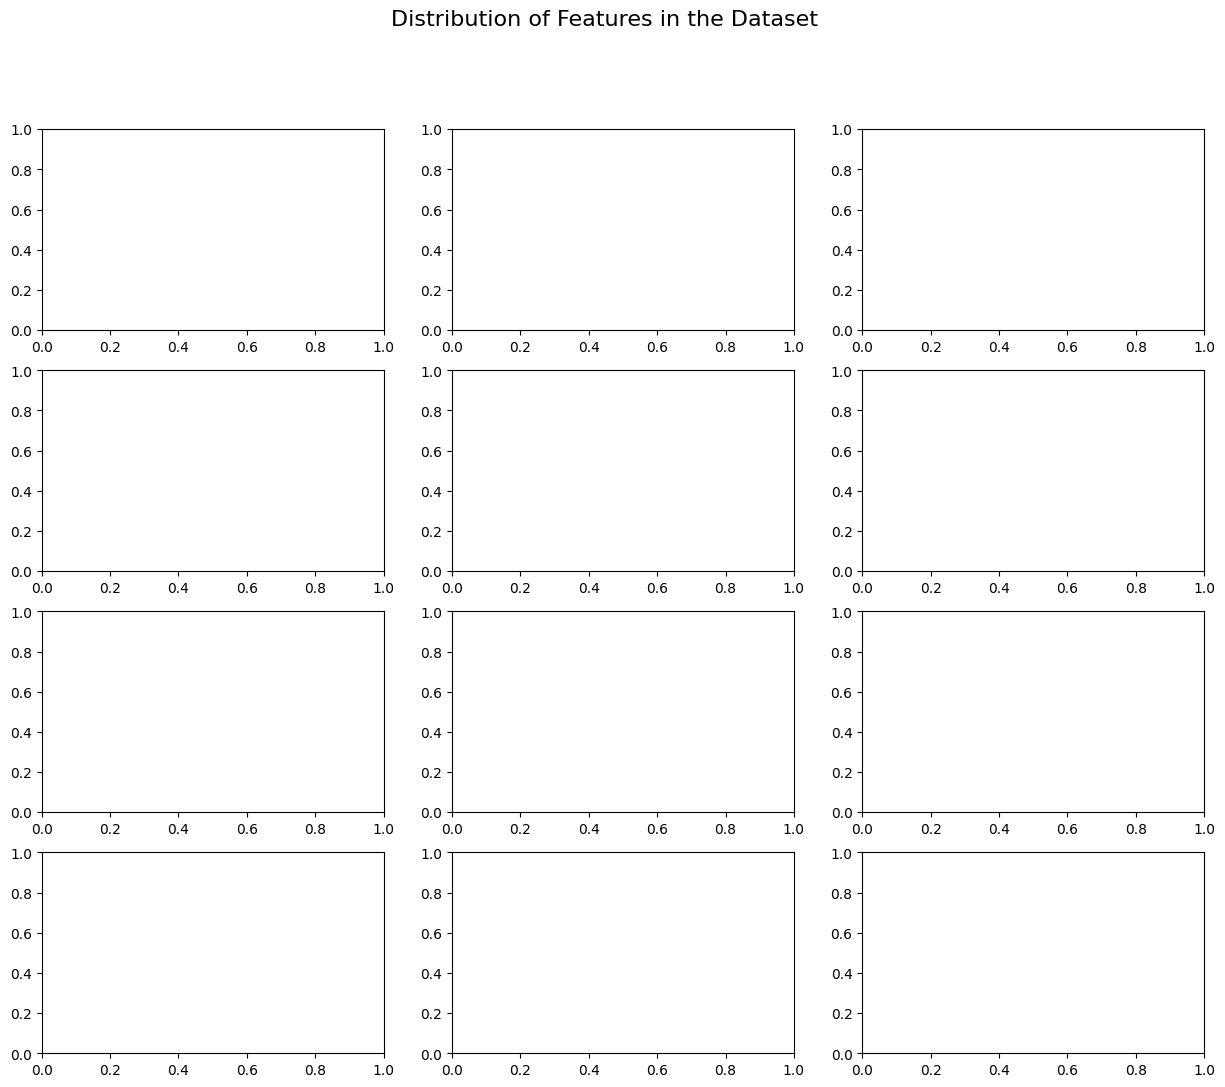

In [76]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
fig.suptitle('Distribution of Features in the Dataset', fontsize=16)

# Plotting histograms
for col, ax in zip(plt, axes.flatten()):
    ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.set_ylabel('Frequency')

# Adjusting layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the histograms
plt.show()
